In [2]:
import os
import re
#import textract
import spacy
#import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
import warnings

warnings.filterwarnings('ignore')

In [ ]:
os.listdir('Resumes_Docx')

['Peoplesoft', 'React Developer', 'SQL Developer', 'workday']

# About dataset

In [ ]:
file_path = r'Resumes_Docx/'
file_name = []
profile   = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)

In [ ]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,Peoplesoft,Peoplesoft Admin_AnubhavSingh.docx
1,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu.docx
2,Peoplesoft,Peoplesoft Admin_Gangareddy.docx
3,Peoplesoft,Peoplesoft Admin_Murali.docx
4,Peoplesoft,Peoplesoft Admin_Priyanka Ramadoss.docx
...,...,...
74,workday,Sri Krishna S_Hexaware.docx
75,workday,Srikanth-Hexaware.docx
76,workday,SSKumar_Hexaware.docx
77,workday,Venkateswarlu B_Hexaware.docx


In [ ]:
file_path1 = []
category1  = []
directory1 = 'Resumes_Docx/Peoplesoft/'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('Peoplesoft')

,Profile,Resumes
0,React Developer,React JS Developer_AnjaniPriyadarshini.docx
1,React Developer,React JS Developer_KotaniDurgaprasad[3_1] (1)-...
2,React Developer,Reactjs Developer_Pranish Sonone_Musquare Tech...
3,React Developer,React Developer_Kamalakar Reddy.docx
4,React Developer,Reactjs Developer_Prabakaran_Musquare Technolo...
...,...,...
75,SQL Developer,premsai.docx
76,SQL Developer,Vinod B.docx
77,SQL Developer,Anil kumar.docx
78,SQL Developer,Neeraj Mishra.docx


In [ ]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft
1,G. Ananda Rayudu\n\n https://www.linkedin.com/...,Peoplesoft
2,PeopleSoft Database Administrator\n\n\n\nGanga...,Peoplesoft
3,Classification: Internal\n\nClassification: In...,Peoplesoft
4,"Priyanka Ramadoss\n\n\n\n61/46, MountPleasant,...",Peoplesoft
5,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft
6,PEOPLESOFT ADMINISTRATOR\n\n\n\n\n\nSRINIVAS.K...,Peoplesoft
7,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft
8,Vinod Akkala PeopleSoft DBA Admin.\n\n\n\n\n\n...,Peoplesoft
9,PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...,Peoplesoft


In [ ]:
file_path2 = []
category2  = []
directory2 = 'Resumes_Docx/React Developer'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React Developer')

In [ ]:
data2 = pd.DataFrame(data = file_path2, columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,Name: Ravali P \n\n\n\n ...,React Developer
1,SUSOVAN BAG \n\nSeeking a challenging po...,React Developer
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React Developer
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React Developer
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React Developer
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React Developer
6,Pavas\n\nGoswami\n\nFULLSTACK SOFTWARE DEVELOP...,React Developer
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React Developer
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React Developer
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React Developer


In [ ]:
file_path3= []
category3= []
directory3= 'Resumes_Docx/SQL Developer'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [ ]:
data3= pd.DataFrame(data = file_path3, columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4,Nazeer Basha\n\nSQL and Power BIDeveloper\n\n\...,SQL Developer
5,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
6,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
7,SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L\n\n...,SQL Developer
8,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
9,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer


In [ ]:
file_path4= []
category4= []
directory4= 'Resumes_Docx/workday/'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('workday')

In [ ]:
data4= pd.DataFrame(data = file_path4, columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,workday
2,Hari Krishna M\n\n\n\n\n\n\n\nSummary:\n\n\tA ...,workday
3,Harikrishna Akula\n\n\n\n\n\n\n\nSummary:\n\n\...,workday
4,HIMA.MENDU\n\n\n\n\n\nCareer Objective\n\nTo c...,workday
5,G Himaja\n\n ...,workday
6,Name: J. Sumanth Royal.\n\n\n\n\n\nPROFESSION...,workday
7,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday
8,Madeeswar A\n\n\n\n\n\n\n\n\n\n\n\nPROFILE SUM...,workday
9,Mooraboyina Guravaiah\n\nWorkday Integration S...,workday


# Create a DataFrame

In [ ]:
resume_data = data1.append([data2, data3, data4], ignore_index = True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,NaN,NaN,NaN
1,G. Ananda Rayudu\n\n https://www.linkedin.com/...,Peoplesoft,NaN,NaN,NaN
2,PeopleSoft Database Administrator\n\n\n\nGanga...,Peoplesoft,NaN,NaN,NaN
3,Classification: Internal\n\nClassification: In...,Peoplesoft,NaN,NaN,NaN
4,"Priyanka Ramadoss\n\n\n\n61/46, MountPleasant,...",Peoplesoft,NaN,NaN,NaN
...,...,...,...,...,...
74,Workday Integration Consultant\n\n\n\n\tName\t...,NaN,NaN,NaN,workday
75,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,workday
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,workday
77,Venkateswarlu.B\tWorkday Consultant\n\n\n\n\n\...,NaN,NaN,NaN,workday


### Merge all Unnecessary column in One Column

In [ ]:
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
1,G. Ananda Rayudu\n\n https://www.linkedin.com/...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
2,PeopleSoft Database Administrator\n\n\n\nGanga...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
3,Classification: Internal\n\nClassification: In...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
4,"Priyanka Ramadoss\n\n\n\n61/46, MountPleasant,...",Peoplesoft,NaN,NaN,NaN,Peoplesoft
...,...,...,...,...,...,...
74,Workday Integration Consultant\n\n\n\n\tName\t...,NaN,NaN,NaN,workday,workday
75,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,workday,workday
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,workday,workday
77,Venkateswarlu.B\tWorkday Consultant\n\n\n\n\n\...,NaN,NaN,NaN,workday,workday


In [ ]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  79 non-null     object
 1   Category1    20 non-null     object
 2   Category2    24 non-null     object
 3   Category3    14 non-null     object
 4   Category4    21 non-null     object
 5   Category     79 non-null     object
dtypes: object(6)
memory usage: 3.8+ KB


In [ ]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

# final dataset

In [ ]:
resume_data

,Category,Raw_Details
0,Peoplesoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,Peoplesoft,G. Ananda Rayudu\n\n https://www.linkedin.com/...
2,Peoplesoft,PeopleSoft Database Administrator\n\n\n\nGanga...
3,Peoplesoft,Classification: Internal\n\nClassification: In...
4,Peoplesoft,"Priyanka Ramadoss\n\n\n\n61/46, MountPleasant,..."
...,...,...
74,workday,Workday Integration Consultant\n\n\n\n\tName\t...
75,workday,Srikanth (WORKDAY hCM Consultant)\t ...
76,workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
77,workday,Venkateswarlu.B\tWorkday Consultant\n\n\n\n\n\...


### change the csv file

In [ ]:
resume_data.to_csv('Resumes.csv', index=False)

# EDA

### read the file

In [ ]:
data = pd.read_csv("Raw_Resume.csv")
data.head()

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,G. Ananda Rayudu\n\n https://www.linkedin.com/...
2,PeopleSoft,PeopleSoft Database Administrator\n\n\n\nGanga...
3,PeopleSoft,Classification: Internal\n\nClassification: In...
4,PeopleSoft,"Priyanka Ramadoss\n\n\n\n61/46, MountPleasant,..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     79 non-null     object
 1   Raw_Details  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [ ]:
data.isnull()

,Category,Raw_Details
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
74,False,False
75,False,False
76,False,False
77,False,False


In [ ]:
data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

### heatmap

<Axes: >

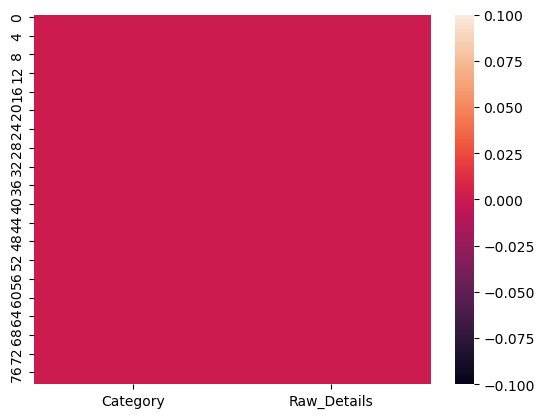

In [ ]:
sns.heatmap(data.isnull())

#  TEXT MINING

### Number of word count

In [ ]:
data1['Word_Count'] = data1['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
data1[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455
1,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356
2,Rahul Ahuja\n\n-------------------------------...,1458
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918
4,PeopleSoft Database Administrator\n\n\n\nGanga...,738


### Number of Characters count

In [ ]:
data1['Char_Count'] = data1['Raw_Details'].str.len()
data1[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",3800
1,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,2150
2,Rahul Ahuja\n\n-------------------------------...,10639
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,7943
4,PeopleSoft Database Administrator\n\n\n\nGanga...,6104


### number of stopword

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data1['Stopwords'] =data1['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
data1[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",86
1,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,42
2,Rahul Ahuja\n\n-------------------------------...,308
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,225
4,PeopleSoft Database Administrator\n\n\n\nGanga...,177


###  Number of Numerics

In [ ]:
data1['Numerics'] = data1['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data1[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",15
1,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,8
2,Rahul Ahuja\n\n-------------------------------...,25
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,4
4,PeopleSoft Database Administrator\n\n\n\nGanga...,4


In [ ]:
data1.head()

,Raw_Details,Category1,Word_Count,Char_Count,Stopwords,Numerics
0,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft,455,3800,86,15
1,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft,356,2150,42,8
2,Rahul Ahuja\n\n-------------------------------...,Peoplesoft,1458,10639,308,25
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft,918,7943,225,4
4,PeopleSoft Database Administrator\n\n\n\nGanga...,Peoplesoft,738,6104,177,4


#  Regular Expression

In [ ]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)



In [ ]:
data = pd.read_csv('Raw_Resume.csv')
data['Resume_Details'] =data.Raw_Details.apply(lambda x: preprocess(x))


In [ ]:
data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,G. Ananda Rayudu\n\n https://www.linkedin.com/...,ananda rayudu profile summary years experience...
2,PeopleSoft,PeopleSoft Database Administrator\n\n\n\nGanga...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
4,PeopleSoft,"Priyanka Ramadoss\n\n\n\n61/46, MountPleasant,...",priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...
74,workday,Workday Integration Consultant\n\n\n\n\tName\t...,workday integration consultant name sri krishn...
75,workday,Srikanth (WORKDAY hCM Consultant)\t ...,srikanth workday hcm consultant seeking suitab...
76,workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday hcm fcm name kumar role workday consul...
77,workday,Venkateswarlu.B\tWorkday Consultant\n\n\n\n\n\...,venkateswarlu workday consultant years experie...


### Save the Clean Data in new CSV File

In [ ]:
data.drop(['Raw_Details'], axis = 1, inplace = True)
data.head()

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,ananda rayudu profile summary years experience...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...


In [ ]:
data.Resume_Details[10]

'peoplesoft administration vivekanand sayana career objective valid expertise years peoplesoft hope enhance skill set adding value business enable implementation solutions aid company objectives understanding anticipating needs interests motivations clients deliver time budget quality delivering value improving agility quality reliability professional summary years experience peoplesoft implementation support configuration migrations maintenance administration application server domains process scheduler servers web server domains peopletools upgrades application updates pum ses elastic search experience integration activities various peoplesoft financials hrms epm fscm environments extensively involved resolving performance issues experience driving infrastructure hardware upgrades disaster recovery activities experience health check peoplesoft environments experience peoplesoft database refreshes production development testing environments experience performance tuning application se

#  Named Entity Recognition (NER)

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        totalWords.append(word)
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 597), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 359), ('data', 332), ('reports', 326), ('project', 325), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 170), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('people', 160), ('technical', 159), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('responsibilities', 147), ('various', 146), ('oracle', 142), ('role', 142), ('environment', 139), ('developer', 138), ('management', 136), ('security', 134), ('eib', 134), ('production', 133)]


#  Parts Of Speech (POS) Tagging

In [ ]:
!python -m spacy download en_core_web_lg

2023-12-22 00:10:41.331285: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 00:10:41.331368: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-22 00:10:41.334174: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-22 00:10:43.276247: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [ ]:
for token in doc_block[:30]:
    print(token,token.pos_)

d PROPN
pum PROPN
peoplesoft PROPN
update NOUN
manager NOUN
installation NOUN
dpk PROPN
working VERB
knowledge NOUN
ansible ADJ
docker NOUN
developing VERB
new ADJ
shell NOUN
scripts NOUN
troubleshooting VERB
shell NOUN
script NOUN
failures NOUN
techmahindra PROPN
role PROPN
project NOUN
application NOUN
support NOUN
automation NOUN
devops NOUN
tools NOUN
peoplesoft VERB
admin NOUN
skills NOUN


### filter the noun and verb from the text to tokens

In [ ]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'work', 'environment', 'challenging', 'assignments', 'yield', 'benefits', 'job', 'satisfaction', 'paced', 'growth', 'experience', 'role', 'system', 'admin', 'skills', 'shell', 'managing', 'production', 'environments', 'support', 'environments', 'installed', 'involved', 'day', 'day', 'activities', 'project', 'migration', 'database', 'refresh', 'system', 'admin', 'changes', 'tax', 'updates', 'troubleshooting', 'servers', 'application', 'servers', 'web', 'servers', 'process', 'scheduler', 'servers', 'applying', 'patches', 'applications', 'working', 'shell', 'scripting', 'used', 'integration', 'method', 'exchange', 'files', 'systems', 'installation', 'troubleshooting', 'tier', 'setup', 'requirement', 'reviewing', 'vulne

###  Count the  all Nouns and Verbs present in a Tokens

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,544
1,application,417
2,using,384
3,workday,352
4,reports,326
5,data,307
6,project,287
7,business,260
8,server,243
9,web,237


### Top 20 Nouns and Verbs in the plot

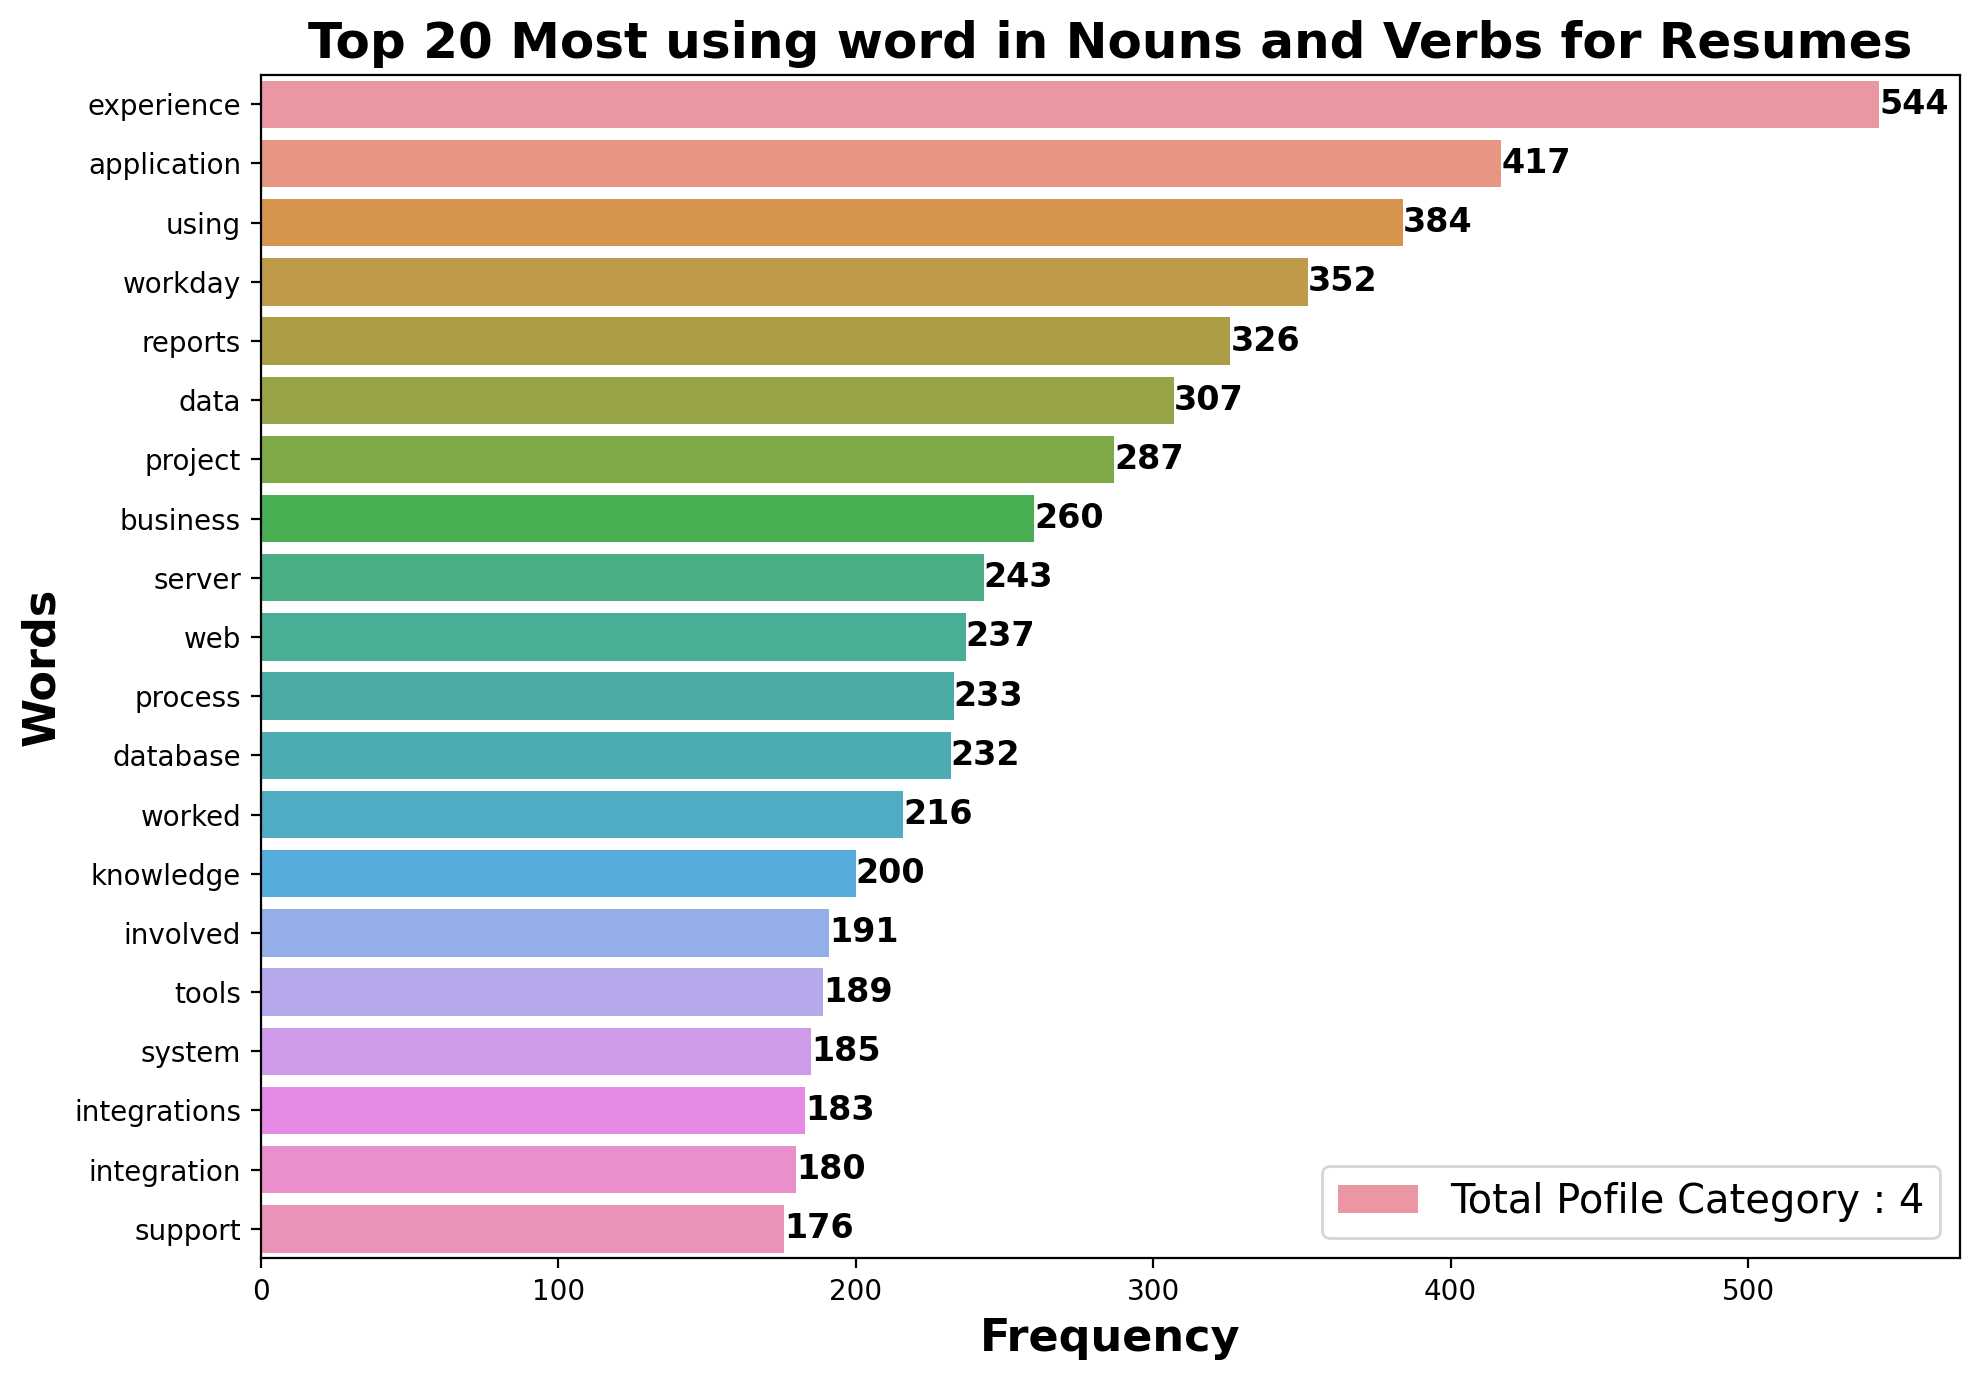

In [ ]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 20 Most using word in Nouns and Verbs for Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)


fig.tight_layout()
plt.show()


# word format

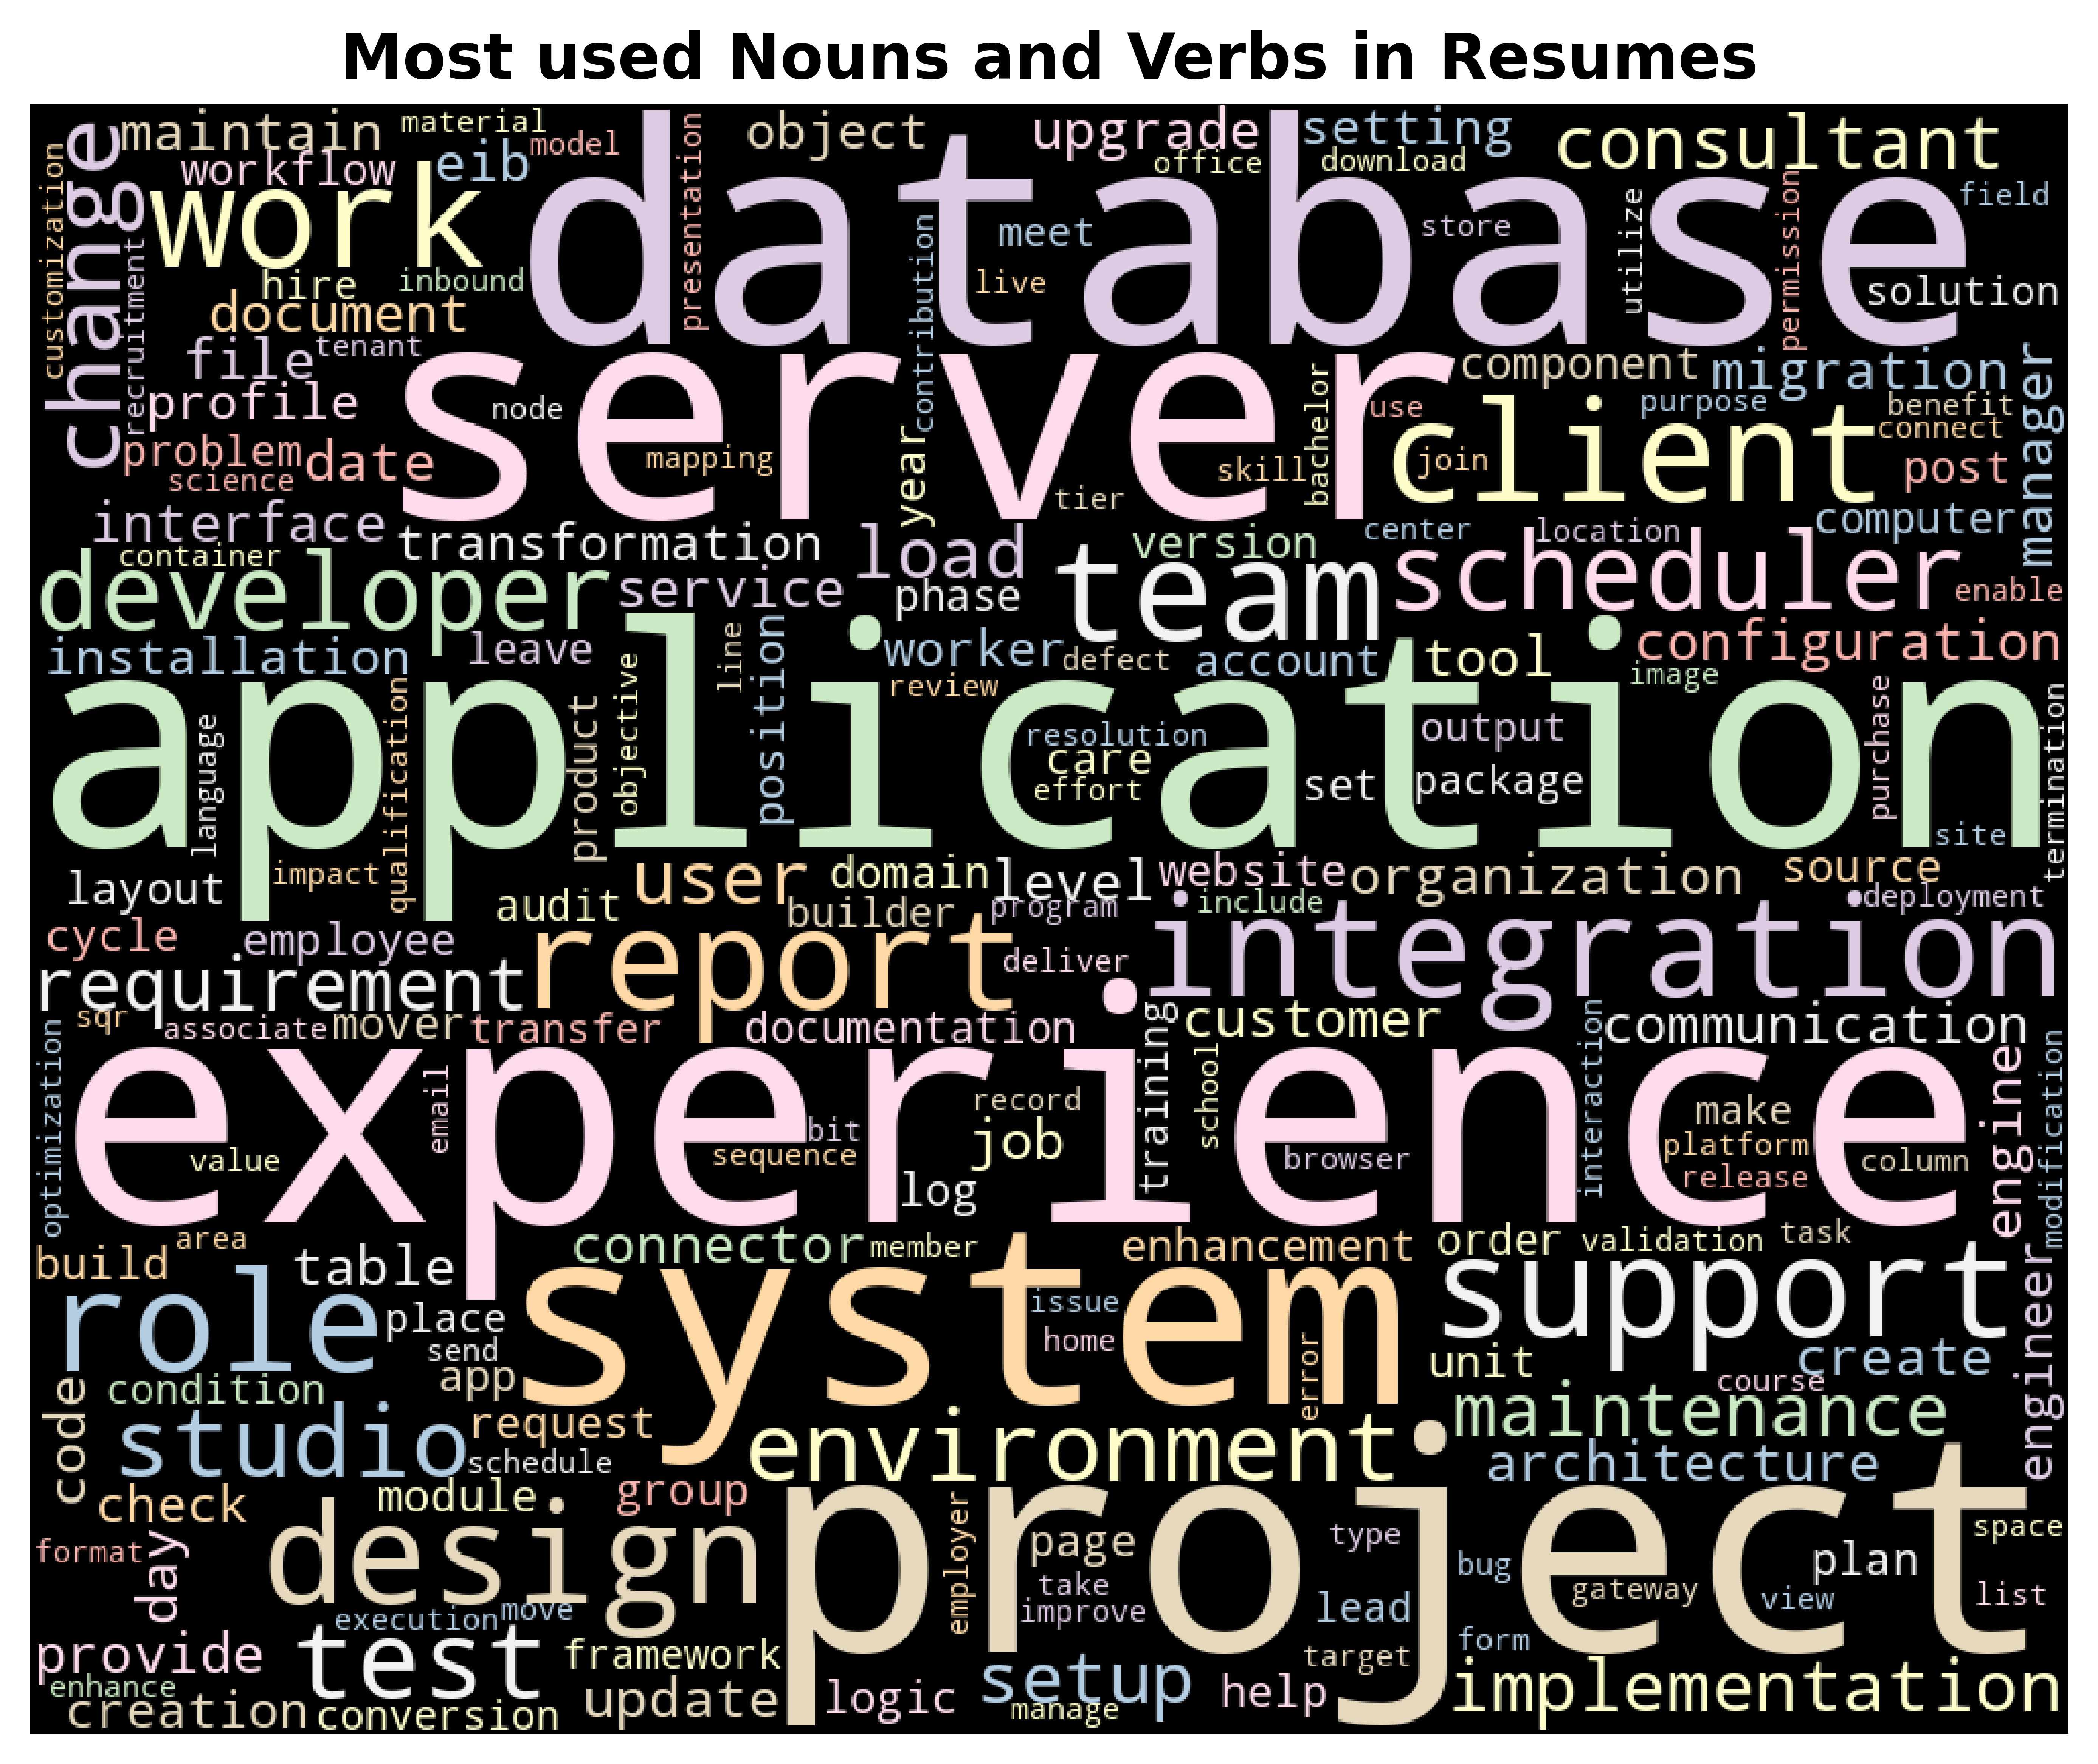

In [ ]:
text = " ".join(cat for cat in wd_df.Words)

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800)
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")


plt.show()

# model building

In [4]:
data=pd.read_csv("/content/Cleaned_Resumes (1).csv")
data.head()

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh work globally competitive ...
1,PeopleSoft,ananda rayudu profile summary years experience...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal murali experience summ...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...


### split the data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X= data['Resume_Details'].values
y= data['Category'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=45, test_size=0.25)
X_train.shape, X_test.shape


((59,), (20,))

### Vectorization

###  Use BoW to convert test to numeric

In [8]:
count_vect = CountVectorizer()

In [9]:
X_train_counts = count_vect.fit_transform(X_train)

In [10]:
X_train_counts.shape

(59, 3863)

### Use TF-IDF to convert test to numeric

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tfidf = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [13]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [14]:
X_train.shape, X_test.shape

((59,), (20,))

In [15]:
print(y_train),print(y_test)

['React JS Developer' 'React JS Developer' 'SQL Developer' 'Workday'
 'React JS Developer' 'Workday' 'PeopleSoft' 'PeopleSoft'
 'React JS Developer' 'Workday' 'React JS Developer' 'PeopleSoft'
 'React JS Developer' 'SQL Developer' 'Workday' 'SQL Developer' 'Workday'
 'PeopleSoft' 'React JS Developer' 'PeopleSoft' 'Workday'
 'React JS Developer' 'PeopleSoft' 'SQL Developer' 'SQL Developer'
 'PeopleSoft' 'Workday' 'Workday' 'SQL Developer' 'React JS Developer'
 'React JS Developer' 'React JS Developer' 'React JS Developer' 'Workday'
 'Workday' 'Workday' 'PeopleSoft' 'React JS Developer' 'PeopleSoft'
 'Workday' 'React JS Developer' 'Workday' 'React JS Developer'
 'PeopleSoft' 'Workday' 'PeopleSoft' 'SQL Developer' 'SQL Developer'
 'SQL Developer' 'PeopleSoft' 'Workday' 'PeopleSoft' 'Workday'
 'React JS Developer' 'Workday' 'React JS Developer' 'PeopleSoft'
 'React JS Developer' 'Workday']
['React JS Developer' 'React JS Developer' 'PeopleSoft'
 'React JS Developer' 'React JS Developer' 'P

(None, None)

In [16]:
len(y_train),len(y_test)

(59, 20)

# Classification Models

            # MODELS
               *SVM
               *KNN
               *RandomForest
               *LogisticRegression
               *DecisionTree
               *Naive Bayes Classifier
               

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

 ### SVM Classifier

In [ ]:
model1=SVC(C=0.5,gamma=0.01,kernel='rbf')

In [ ]:
model1.fit(X_train_tfidf,y_train)

SVC(C=0.5, gamma=0.01)

#### prediction

In [ ]:
train_pred=model1.predict(X_train_tfidf)
test_pred=model1.predict(X_test_tfidf)

#### train data

In [ ]:
cm_train=confusion_matrix(y_train,train_pred)
cm_train

array([[ 0, 11,  0,  3],
       [ 0, 18,  0,  0],
       [ 0,  9,  0,  0],
       [ 0,  0,  0, 18]])

<Axes: >

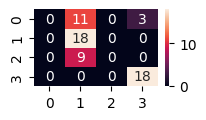

In [ ]:
plt.figure(figsize=(2,1))
sns.heatmap(data=cm_train,annot=True)

In [ ]:
print(classification_report(y_train,train_pred))

                    precision    recall  f1-score   support

        PeopleSoft       0.00      0.00      0.00        14
React JS Developer       0.47      1.00      0.64        18
     SQL Developer       0.00      0.00      0.00         9
           Workday       0.86      1.00      0.92        18

          accuracy                           0.61        59
         macro avg       0.33      0.50      0.39        59
      weighted avg       0.41      0.61      0.48        59



##### test data

In [ ]:
cm_test=confusion_matrix(y_test,test_pred)
cm_test

array([[0, 6, 0, 0],
       [0, 6, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 0, 3]])

<Axes: >

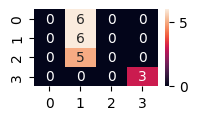

In [ ]:
plt.figure(figsize=(2,1))
sns.heatmap(data=cm_test,annot=True)

In [ ]:
print(classification_report(y_test,test_pred))

                    precision    recall  f1-score   support

        PeopleSoft       0.00      0.00      0.00         6
React JS Developer       0.35      1.00      0.52         6
     SQL Developer       0.00      0.00      0.00         5
           Workday       1.00      1.00      1.00         3

          accuracy                           0.45        20
         macro avg       0.34      0.50      0.38        20
      weighted avg       0.26      0.45      0.31        20



In [ ]:
print('Accuracy of training set : {:.2f}'.format(model1.score(X_train_tfidf, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model1.score(X_test_tfidf, y_test)))

Accuracy of training set : 0.61
Accuracy of  test set    : 0.45


# KNN

In [ ]:
model2=KNeighborsClassifier(n_neighbors=5)

In [ ]:
model2.fit(X_train_tfidf,y_train)

KNeighborsClassifier()

### prediction

### test data

In [ ]:
cm=confusion_matrix(y_test,test_pred)
cm

array([[6, 0, 0, 0],
       [0, 6, 0, 0],
       [0, 0, 5, 0],
       [0, 0, 0, 3]])

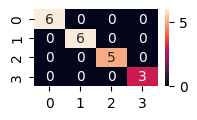

In [ ]:
plt.figure(figsize=(2,1))
sns.heatmap(data=cm,annot=True)
plt.show()

In [ ]:
print(classification_report(y_test,test_pred))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         6
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         5
           Workday       1.00      1.00      1.00         3

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20



In [ ]:
print('Accuracy of training set : {:.2f}'.format(model2.score(X_train_tfidf, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model2.score(X_test_tfidf, y_test)))

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00


# RandomForest

In [ ]:
model3=RandomForestClassifier(n_estimators=50,max_features=4,max_depth=8)

In [ ]:
model3.fit(X_train_tfidf,y_train)

RandomForestClassifier(max_depth=8, max_features=4, n_estimators=50)

### prediction

In [ ]:
rftrain_pred=model3.predict(X_train_tfidf)
rftest_pred=model3.predict(X_test_tfidf)


### train data

In [ ]:
cm=confusion_matrix(y_train,rftrain_pred)
cm

array([[14,  0,  0,  0],
       [ 0, 18,  0,  0],
       [ 0,  0,  9,  0],
       [ 0,  0,  0, 18]])

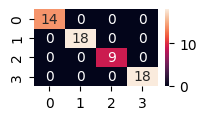

In [ ]:
plt.figure(figsize=(2,1))
sns.heatmap(data=cm,annot=True)
plt.show()

In [ ]:
print(classification_report(y_train,rftrain_pred))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00        14
React JS Developer       1.00      1.00      1.00        18
     SQL Developer       1.00      1.00      1.00         9
           Workday       1.00      1.00      1.00        18

          accuracy                           1.00        59
         macro avg       1.00      1.00      1.00        59
      weighted avg       1.00      1.00      1.00        59



### test data

In [ ]:
cm=confusion_matrix(y_test,rftest_pred)
cm

array([[5, 1, 0, 0],
       [0, 6, 0, 0],
       [0, 2, 1, 2],
       [0, 0, 0, 3]])

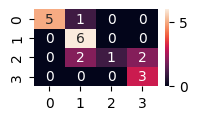

In [ ]:
plt.figure(figsize=(2,1))
sns.heatmap(data=cm,annot=True)
plt.show()

In [ ]:
print(classification_report(y_test,rftest_pred))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.83      0.91         6
React JS Developer       0.67      1.00      0.80         6
     SQL Developer       1.00      0.20      0.33         5
           Workday       0.60      1.00      0.75         3

          accuracy                           0.75        20
         macro avg       0.82      0.76      0.70        20
      weighted avg       0.84      0.75      0.71        20



In [ ]:
print('Accuracy of training set : {:.2f}'.format(model3.score(X_train_tfidf, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model3.score(X_test_tfidf, y_test)))

Accuracy of training set : 1.00
Accuracy of  test set    : 0.75


# LogisticRegression

In [ ]:
model4=LogisticRegression()

In [ ]:
model4.fit(X_train_tfidf,y_train)

LogisticRegression()

### prediction

In [ ]:
train_pred=model4.predict(X_train_tfidf)
test_pred=model4.predict(X_test_tfidf)


### train data

In [ ]:
confusion_matrix(y_train,train_pred)

array([[ 0, 11,  0,  3],
       [ 0, 18,  0,  0],
       [ 0,  9,  0,  0],
       [ 0,  0,  0, 18]])

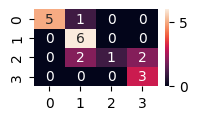

In [ ]:
plt.figure(figsize=(2,1))
sns.heatmap(data=cm,annot=True)
plt.show()

In [ ]:
print(classification_report(y_train,train_pred))

                    precision    recall  f1-score   support

        PeopleSoft       0.00      0.00      0.00        14
React JS Developer       0.47      1.00      0.64        18
     SQL Developer       0.00      0.00      0.00         9
           Workday       0.86      1.00      0.92        18

          accuracy                           0.61        59
         macro avg       0.33      0.50      0.39        59
      weighted avg       0.41      0.61      0.48        59



test data

In [ ]:
cm=confusion_matrix(y_test,test_pred)
cm

array([[0, 6, 0, 0],
       [0, 6, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 0, 3]])

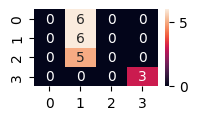

In [ ]:
plt.figure(figsize=(2,1))
sns.heatmap(data=cm,annot=True)
plt.show()

In [ ]:
print(classification_report(y_test,test_pred))

                    precision    recall  f1-score   support

        PeopleSoft       0.00      0.00      0.00         6
React JS Developer       0.35      1.00      0.52         6
     SQL Developer       0.00      0.00      0.00         5
           Workday       1.00      1.00      1.00         3

          accuracy                           0.45        20
         macro avg       0.34      0.50      0.38        20
      weighted avg       0.26      0.45      0.31        20



In [ ]:
print('Accuracy of training set : {:.2f}'.format(model4.score(X_train_tfidf, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model4.score(X_test_tfidf, y_test)))

Accuracy of training set : 1.00
Accuracy of  test set    : 0.90


# DecisionTree

In [19]:
model5=DecisionTreeClassifier(max_depth=8,min_samples_leaf=10)

In [20]:
model5.fit(X_train_tfidf,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10)

#### pridiction

In [21]:
train_pred=model5.predict(X_train_tfidf)
test_pred=model5.predict(X_test_tfidf)

train data

In [22]:
cm=confusion_matrix(y_train,train_pred)
cm

array([[14,  0,  0,  0],
       [ 0, 17,  1,  0],
       [ 0,  0,  9,  0],
       [ 0,  0,  0, 18]])

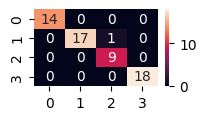

In [23]:
plt.figure(figsize=(2,1))
sns.heatmap(data=cm,annot=True)
plt.show()

In [24]:
print(classification_report(y_train,train_pred))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00        14
React JS Developer       1.00      0.94      0.97        18
     SQL Developer       0.90      1.00      0.95         9
           Workday       1.00      1.00      1.00        18

          accuracy                           0.98        59
         macro avg       0.97      0.99      0.98        59
      weighted avg       0.98      0.98      0.98        59



test data

In [25]:
cm=confusion_matrix(y_test,test_pred)
cm

array([[6, 0, 0, 0],
       [0, 5, 1, 0],
       [0, 0, 5, 0],
       [0, 0, 0, 3]])

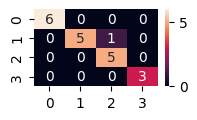

In [26]:
plt.figure(figsize=(2,1))
sns.heatmap(data=cm,annot=True)
plt.show()

In [27]:
print(classification_report(y_test,test_pred))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         6
React JS Developer       1.00      0.83      0.91         6
     SQL Developer       0.83      1.00      0.91         5
           Workday       1.00      1.00      1.00         3

          accuracy                           0.95        20
         macro avg       0.96      0.96      0.95        20
      weighted avg       0.96      0.95      0.95        20



In [28]:
print('Accuracy of training set : {:.2f}'.format(model5.score(X_train_tfidf, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model5.score(X_test_tfidf, y_test)))

Accuracy of training set : 0.98
Accuracy of  test set    : 0.95


# Naive Bayes Classifier

In [ ]:
model6 =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)

In [ ]:
model6.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1, fit_prior=False)

In [ ]:
train_pred=model6.predict(X_train_tfidf)
test_pred=model6.predict(X_test_tfidf)

train data

In [ ]:
confusion_matrix(y_train,train_pred)


array([[14,  0,  0,  0],
       [ 0, 18,  0,  0],
       [ 0,  0,  9,  0],
       [ 0,  0,  0, 18]])

In [ ]:
print(classification_report(y_train,train_pred))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00        14
React JS Developer       1.00      1.00      1.00        18
     SQL Developer       1.00      1.00      1.00         9
           Workday       1.00      1.00      1.00        18

          accuracy                           1.00        59
         macro avg       1.00      1.00      1.00        59
      weighted avg       1.00      1.00      1.00        59



test data

In [ ]:
confusion_matrix(y_test,test_pred)

array([[5, 0, 0, 1],
       [0, 6, 0, 0],
       [0, 0, 3, 2],
       [0, 0, 0, 3]])

In [ ]:
print(classification_report(y_test
                            ,test_pred))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.83      0.91         6
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      0.60      0.75         5
           Workday       0.50      1.00      0.67         3

          accuracy                           0.85        20
         macro avg       0.88      0.86      0.83        20
      weighted avg       0.93      0.85      0.86        20



In [ ]:
print('Accuracy of training set : {:.2f}'.format(model6.score(X_train_tfidf, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model6.score(X_test_tfidf, y_test)))

Accuracy of training set : 1.00
Accuracy of  test set    : 0.85


In [31]:
import joblib

# Assuming 'clf' is your DecisionTreeClassifier instance
clf = DecisionTreeClassifier()
# Train your model

# Save the model
joblib.dump(clf, 'modelDT.pkl')


['modelDT.pkl']